# Decision Tree - with data (Heart Disease)

### Download and Import modules necessarily for the project
Data from : https://archive.ics.uci.edu/dataset/45/heart+disease
Using processed.cleveland.data

In [58]:
# Load libraries
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


In [59]:
# load dataset
file_path = "C:/Users/USER/Documents/1. Job/Python WarmUp - Missing value and Decision Tree/heart+disease/processed.cleveland.data"
df = pd.read_csv(file_path, header=None)


Let's reaplce the column with the follwing columns names

- age
- sex
- cp, chest pain
- restbp, resting blood pressure(in mm Hg)
- chol, serum cholesterol in mg 
- fbs, fasting blood sugar
- restecg, resting electrocardiographic results
- thalach, maximum heart rate achieved
- exang, exercise induced angina
- oldpeak, ST depression induced by exercise relatice to rest
- slope, the slope of the peak exercise ST segment
- ca, number of major vessels (0-3) colored by fluoroscopy
- thal, this is short of thailium heart scan
- target, diagnosis of heart disease, the predict attribute


In [60]:
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 
         'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


## Missing Data Part 1 : Identifying Missing Data

In [61]:
df.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
target        int64
dtype: object

In [62]:
# Assuming df is your DataFrame
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values for {column}: {unique_values}")


Unique values for age: [63. 67. 37. 41. 56. 62. 57. 53. 44. 52. 48. 54. 49. 64. 58. 60. 50. 66.
 43. 40. 69. 59. 42. 55. 61. 65. 71. 51. 46. 45. 39. 68. 47. 34. 35. 29.
 70. 77. 38. 74. 76.]
Unique values for sex: [1. 0.]
Unique values for cp: [1. 4. 3. 2.]
Unique values for trestbps: [145. 160. 120. 130. 140. 172. 150. 110. 132. 117. 135. 112. 105. 124.
 125. 142. 128. 170. 155. 104. 180. 138. 108. 134. 122. 115. 118. 100.
 200.  94. 165. 102. 152. 101. 126. 174. 148. 178. 158. 192. 129. 144.
 123. 136. 146. 106. 156. 154. 114. 164.]
Unique values for chol: [233. 286. 229. 250. 204. 236. 268. 354. 254. 203. 192. 294. 256. 263.
 199. 168. 239. 275. 266. 211. 283. 284. 224. 206. 219. 340. 226. 247.
 167. 230. 335. 234. 177. 276. 353. 243. 225. 302. 212. 330. 175. 417.
 197. 198. 290. 253. 172. 273. 213. 305. 216. 304. 188. 282. 185. 232.
 326. 231. 269. 267. 248. 360. 258. 308. 245. 270. 208. 264. 321. 274.
 325. 235. 257. 164. 141. 252. 255. 201. 222. 260. 182. 303. 265. 309.
 307. 249

In [63]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [66]:
len(df)

303

In [67]:
df_ca = df['ca'].unique()
df_ca

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [68]:
df_thal = df['thal'].unique()
df_thal

array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [69]:
 # Replace '?' with NaN
df.replace('?', np.nan, inplace=True)

# Convert 'ca' and 'thal' columns to numeric
df['ca'] = pd.to_numeric(df['ca'])
df['thal'] = pd.to_numeric(df['thal'])

In [70]:
# Check for NaN values in 'ca' and 'thal' columns
print("Number of NaN values in 'ca' column:", df['ca'].isnull().sum())
print("Number of NaN values in 'thal' column:", df['thal'].isnull().sum())


Number of NaN values in 'ca' column: 4
Number of NaN values in 'thal' column: 2


In [71]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

### Missing Data Part 1 : Filling in nan value with Mean Value

In [72]:
# # Compute the mean of 'ca' and 'thal' columns
# ca_mean = df['ca'].mean()
# thal_mean = df['thal'].mean()

# # Fill NaN values with the mean of each column
# df['ca'].fillna(value=ca_mean, inplace=True)
# df['thal'].fillna(value=thal_mean, inplace=True)

# drop data row null due to small percentage
df.dropna(how='any', inplace=True)

print(df.head(10))

    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   
5  56.0  1.0  2.0     120.0  236.0  0.0      0.0    178.0    0.0      0.8   
6  62.0  0.0  4.0     140.0  268.0  0.0      2.0    160.0    0.0      3.6   
7  57.0  0.0  4.0     120.0  354.0  0.0      0.0    163.0    1.0      0.6   
8  63.0  1.0  4.0     130.0  254.0  0.0      2.0    147.0    0.0      1.4   
9  53.0  1.0  4.0     140.0  203.0  1.0      2.0    155.0    1.0      3.1   

   slope   ca  thal  target  
0    3.0  0.0   6.0       0  
1    2.0  3.0   3.0       2  
2    2.0  2.0   7.0       1  
3    3.0  0.0   3.0       0  
4 

In [73]:
df_ca = df['ca'].unique()
df_ca

array([0., 3., 2., 1.])

In [74]:
df_thall = df['thal'].unique()
df_thall


array([6., 3., 7.])

### Fomat Data part 1 :  Split the Data into Dependet and Independent Variables

In [75]:
X = df.drop('target', axis=1).copy()
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [76]:
Y = df['target'].copy()
Y.head()

0    0
1    2
2    1
3    0
4    0
Name: target, dtype: int64

## Format the Data Part 2 : One Hot Encoding

- age - **Float**
- sex - **Category** 
  - 0 = female
  - 1 = male
- cp, chest pain - **Category**
  - 1 = typical angina
  - 2 = atypical angina
  - 3 = non-aginal pain
  - 4 = asymptomatic
- restbp, resting blood pressure(in mm Hg) - **Float**
- chol, serum cholesterol in mg - **Float**
- fbs, fasting blood sugar - **Category**
  - 0 = >=120mg/dl
  - 1 = <120mg/dl
- restecg, resting electrocardiographic results - **Category**
  - 1 = nromal
  - 2 = having ST-T wave abnormality
  - 3 = showing probable or definte left ventricular hypertrophy
- thalach, maximum heart rate achieved - **Float**
- exang, exercise induced angina - **Category**
  - 0 = no
  - 1 = yes
- oldpeak, ST depression induced by exercise relatice to rest - **Float**
- slope, the slope of the peak exercise ST segment - **Category**
  - 1 = unsloping
  - 2 = flat
  - 3 = downsloping
- ca, number of major vessels (0-3) colored by fluoroscopy - **Float**
- thal, this is short of thailium heart scan - **Category**
  - 3 = normal (no cold spots)
  - 6 = fixed defect (cold spots during rest and exercise)
  - 7 = erversible defect (when cold spots only appear during exercise)
- target, diagnosis of heart disease, the predict attribute

Now, just to review, let's look at the data types in X to remember how python is seeing the data right now.

In [77]:
X.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
dtype: object

In [78]:
X['cp'].unique()

array([1., 4., 3., 2.])

#

**NOTE**: So, the good news is that cp only contains the value it is suppose to contain, so we'll convert it, using **One-Hot-Encoding**, into a series of columns that only contains 0 and 1. **get_dummies()** from pandas.

Now we need to talk about Category columns that contains mroe than 2 variables.


In [79]:
X_encoded = pd.get_dummies(X, columns=['cp', 'restecg', 'slope', 'thal'], dtype=int)

X_encoded.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,...,0,0,0,1,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,1,0,0,1,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,1,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0


#
Now we need to talk about Category columns that contains mroe than 2 variables.

As we can see, **One-Hot-Encoding** converts a column with more than 2 category, like cp into multiple columns.. Since sex, fbs only **contains 0 and 1** to begin with, we **do not have to do anything special to them**, so we'e done formatting the data for the Classification Tree.

**NOTE**: In practice we would use unique() to verify that they only contain **0 and 1**.

Now one last thing before we build our **Classification Tree**, Y doesnt just contain 0 and 1. Instead it has 5 different levels of heart disease. **0 = no, 1 - 4 = degree of heart disease**. We can see with unique.


In [80]:
Y.unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [81]:
y_not_zero_index = Y > 0
Y[y_not_zero_index] = 1
Y.unique()

array([0, 1], dtype=int64)

***

# Build A Preliminary Classification Tree

At logn last, the data arecorrectly formatted for making a Classfication Tee. New we simply split the data into training and testing sets and build the tree.

In [82]:
## split the data into training and testing data
# using default splitting
x_train, x_test, y_train, y_test = train_test_split(X_encoded, Y, random_state=42)

## create a decision tree and fit it to the training data
hd_model_dt = DecisionTreeClassifier(random_state=42)
hd_model_dt = hd_model_dt.fit(x_train, y_train)

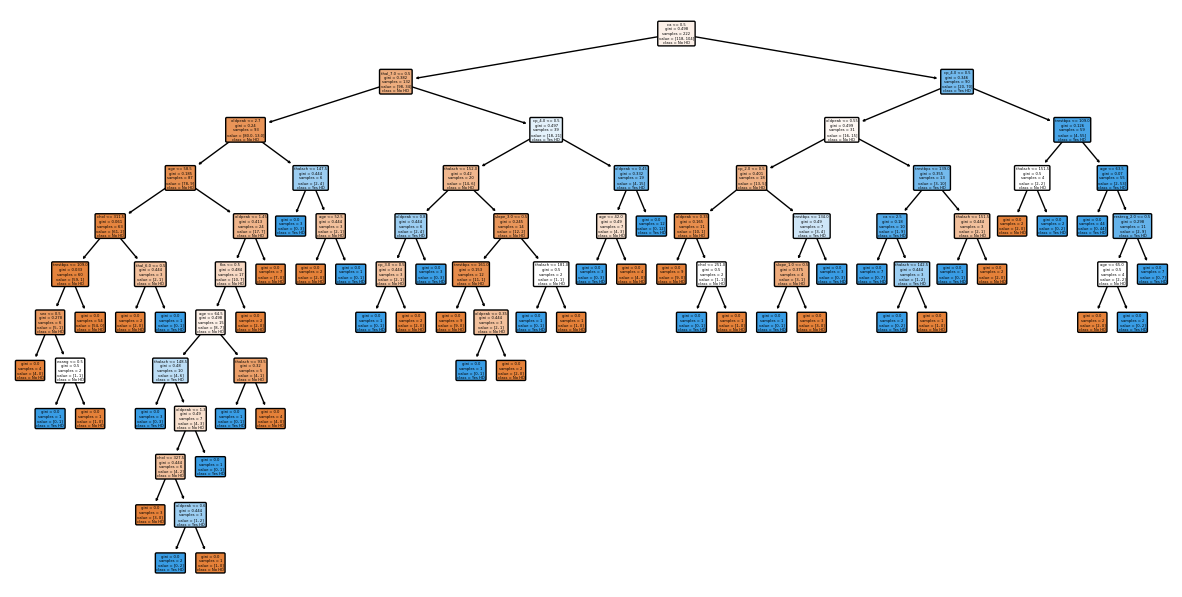

In [83]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Assuming hd_model_dt is your trained decision tree classifier and X_encoded is your DataFrame with one-hot encoded features
plt.figure(figsize=(15, 7.5))
plot_tree(hd_model_dt,
          filled=True,
          rounded=True,
          class_names=["No HD", "Yes HD"],
          feature_names=X_encoded.columns.tolist())  # Convert Index to list
plt.show()

OK, we've built a **Classification tree** for classification. Let's performs on the Testing Dataset by running the Testing Dataset down for the tree and drawing a Confusion Matrix.

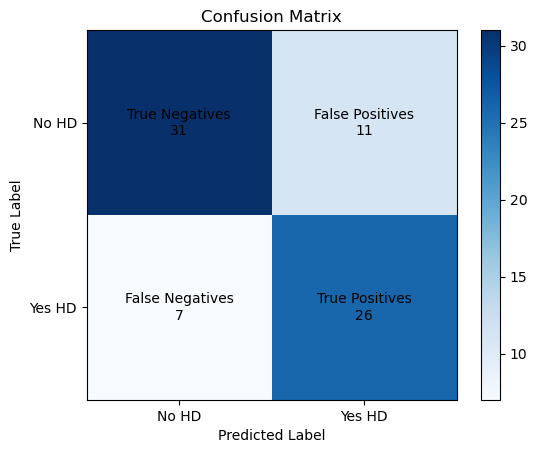

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming hd_model_dt is your trained decision tree classifier and x_test, y_test are your test data
y_pred = hd_model_dt.predict(x_test)
cm = confusion_matrix(y_test, y_pred)

# Define custom class labels
class_labels = ["No HD", "Yes HD"]

# Plot confusion matrix with annotations
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add text annotations with custom class labels
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        if i == 0 and j == 0:
            label = "True Negatives\n{}".format(cm[i, j])
        elif i == 0 and j == 1:
            label = "False Positives\n{}".format(cm[i, j])
        elif i == 1 and j == 0:
            label = "False Negatives\n{}".format(cm[i, j])
        else:
            label = "True Positives\n{}".format(cm[i, j])
        plt.text(j, i, label, ha='center', va='center', color='black')

# Customize ticks and tick labels
plt.xticks(np.arange(len(class_labels)), class_labels)
plt.yticks(np.arange(len(class_labels)), class_labels)

plt.show()


In [85]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_pred, target_names=["No HD", "Yes HD"])

# Print the classification report
print(report)

              precision    recall  f1-score   support

       No HD       0.82      0.74      0.78        42
      Yes HD       0.70      0.79      0.74        33

    accuracy                           0.76        75
   macro avg       0.76      0.76      0.76        75
weighted avg       0.77      0.76      0.76        75



## Cost Complexity Pruning Part 1 : Visualize Alpha

Decision Tree are notorious for being overfit to the Training Dataset, and there are a lot of parameters, like **max_depth and min_samples**, that are designed to reduce overfitting. However, pruning a tree with **cost complexity pruning** can simplify the whole process of finding a smaller tree that **improve the accuracy** with the Testing Dataset.

Pruning a decision tree is all about finding the right value for the pruning parameter, alpha, which controls how little or how much pruning happens, One ways to **find optimal value for alpha is to plot the accuracy** of the tree as a functions of different values. We'll do this for both the **Training Dataset and the Testing Dataset**.

First, let's extract the diffrent values of alpha that are available for this tree and build a pruned tree for each value for alpha. NOTE: We omit the maximum value for alpha with ccp_alphas = ccp_alphas[:-1] because it would prune all leaves, leaving us with only a root instead of a tree.


In [86]:
path = hd_model_dt.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:-1] 
 
hd_model_dts = []

## now create one direction tree per value for alpha and store it in the array
for ccp_alpha in ccp_alphas:
    hd_model_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    hd_model_dt.fit(x_train, y_train)
    hd_model_dts.append(hd_model_dt)

Now let's graph the accuracy of the trees using the Training dataset and Testing dataset as a function of alpha.

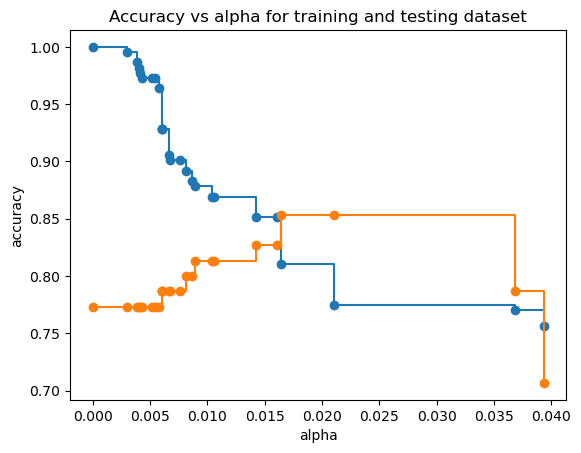

In [87]:
train_scores = [hd_model_dt.score(x_train, y_train) for hd_model_dt in hd_model_dts]
test_scores = [hd_model_dt.score(x_test, y_test) for hd_model_dt in hd_model_dts]

fig,ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing dataset")
ax.plot(ccp_alphas, train_scores, marker='o', label='train', drawstyle='steps-post')
ax.plot(ccp_alphas, test_scores, marker='o', label='test', drawstyle='steps-post')
plt.show()

In the graph above, we see that the accuracy for the Testing dataset hits its **maximum alpha about 0.016**. After this value for alpha the accuracy of the Training Dataset drops off and that suggests we should set **ccp_alpha=0.016**.

**NOTE**: When we apply **Cost Complexity Pruning** ot a **Classification Tree**, values for alpha go from 0 to 1, because **GINI** scores go from 0 to 1. In contrast, values for alpha for a Regression can be much larger since the sum of squared residuals can, in theory,  go from 0 to infinity.

Since there are many ways we could have divided the original dataset into Training and Testing datasets, how do we know we used the **best Training Dataset** and how do we know we used the **best Testing Dataset**? Typically, we answer this question with **10-Fold Cross Validation**. So that's what we're going to do now, and we'll do it with **cross_val_score()** function.

## Cost Complexity Pruning Part 2: Cross Validation To Find Best Alpha

<Axes: xlabel='tree'>

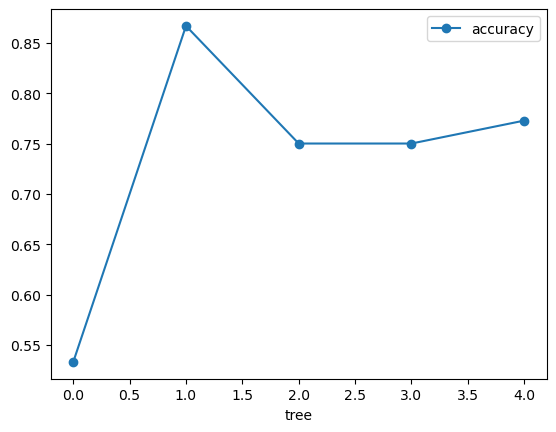

In [93]:
from sklearn.model_selection import cross_val_score

hd_model_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=0.016) # create tree with alpha 0.016

## now use 5-fold cross validatio create 5 different training and testing dataset
## We use 5-fold because we don't have much dataset
scores = cross_val_score(hd_model_dt, x_train, y_train, cv=5)
df = pd.DataFrame(data={'tree': range(5), 'accuracy':scores})\

df.plot(x='tree', y='accuracy', marker='o', linestyle='-')

**NOTE**: Let's use cross validation to find the optimal value for ccp_alpha.

<Axes: xlabel='alpha'>

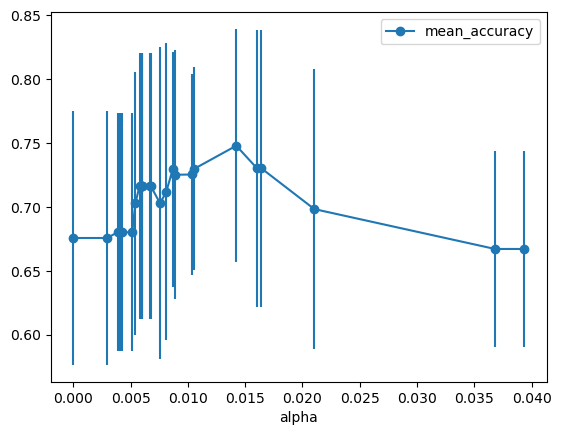

In [124]:
## create an array to store the result of each fold during cross validation
alpha_loop_values = []

## For eahc condidates value for alpha, we weill run 5-fold cross validation.
## then we will store the mean and standard deviation of the scores (the accuracy) for each call
## to cross_val_score in alpha_loop_values ....
for ccp_alpha in ccp_alphas:
    hd_model_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores = cross_val_score(hd_model_dt, x_train, y_train, cv=5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])
    
## now we can draw a graph of the mean and standard dedviations of the scores
alpha_results = pd.DataFrame(alpha_loop_values,
                            columns=['alpha', 'mean_accuracy', 'std'])

alpha_results.plot(x='alpha',
                  y='mean_accuracy',
                  yerr='std',
                  marker='o',
                  linestyle='-')

Using cross validation, we can see that, overall, instead of setting **ccp_alpha = 0.016**, we need to set it something closer to **0.014**. We can find the exact value with:

In [98]:
alpha_results[(alpha_results['alpha'] > 0.014)
             &
             (alpha_results['alpha'] < 0.015)]

,alpha,mean_accuracy,std
20,0.014225,0.747778,0.091395


In [103]:
ideal_ccp_alpha = alpha_results[(alpha_results['alpha'] > 0.014)
                                 &
                                 (alpha_results['alpha'] < 0.015)]['alpha']
ideal_ccp_alpha

20    0.014225
Name: alpha, dtype: float64

**NOTE**: At this point Python thinks that ideal_ccp_alpha is a series, which is a type of array, We can tell because when we printed ideal_ccp_alpha out, we got two bits of stuff, the first one is 20 which is the index of the series, the second one is the 0.014225, is the value we want. So we can convert this from a series to a float.

In [108]:
## convert to float 
ideal_ccp_alpha = float(ideal_ccp_alpha)
ideal_ccp_alpha

0.014224751066856332

# Build, Evaluating, Drawing, and Interpreting the Final Classification Tree

Now that we have the **ideal value for alpha** we can build the final Classification tree by setting **ccp_alpha=ideal_ccp_alpha**:

In [114]:
# Build and train a new decision tree with the optimal value for alpha
hd_model_dt_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=ideal_ccp_alpha)

# Fit the decision tree model on the training data
hd_model_dt_pruned = hd_model_dt_pruned.fit(x_train, y_train)

([<matplotlib.axis.YTick at 0x132a5bc3650>,
 [Text(0, 0, 'No HD'), Text(0, 1, 'Yes HD')])

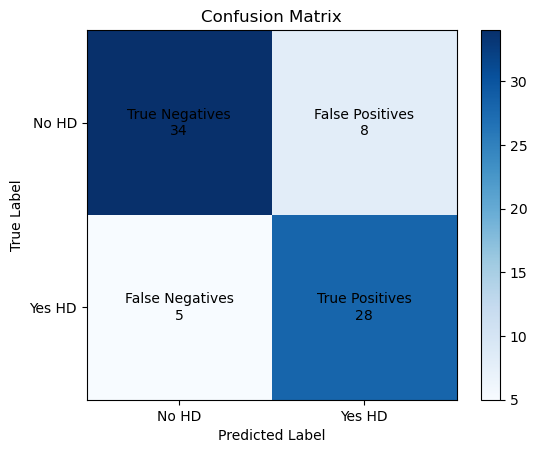

In [117]:
# Assuming hd_model_dt is your trained decision tree classifier and x_test, y_test are your test data
y_pred = hd_model_dt_pruned.predict(x_test)
cm = confusion_matrix(y_test, y_pred)

# Define custom class labels
class_labels = ["No HD", "Yes HD"]

# Plot confusion matrix with annotations
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add text annotations with custom class labels
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        if i == 0 and j == 0:
            label = "True Negatives\n{}".format(cm[i, j])
        elif i == 0 and j == 1:
            label = "False Positives\n{}".format(cm[i, j])
        elif i == 1 and j == 0:
            label = "False Negatives\n{}".format(cm[i, j])
        else:
            label = "True Positives\n{}".format(cm[i, j])
        plt.text(j, i, label, ha='center', va='center', color='black')

# Customize ticks and tick labels
plt.xticks(np.arange(len(class_labels)), class_labels)
plt.yticks(np.arange(len(class_labels)), class_labels)


In [118]:
# Generate classification report
report = classification_report(y_test, y_pred, target_names=["No HD", "Yes HD"])

# Print the classification report
print(report)

              precision    recall  f1-score   support

       No HD       0.87      0.81      0.84        42
      Yes HD       0.78      0.85      0.81        33

    accuracy                           0.83        75
   macro avg       0.82      0.83      0.83        75
weighted avg       0.83      0.83      0.83        75



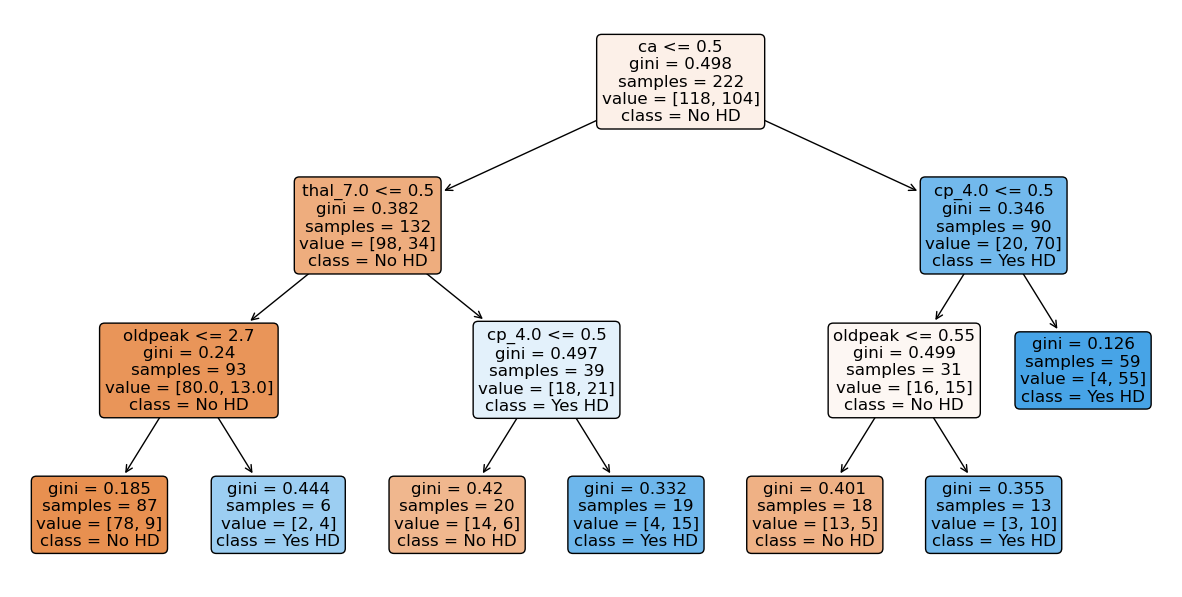

In [119]:
plt.figure(figsize=(15, 7.5))
plot_tree(hd_model_dt_pruned,
          filled=True,
          rounded=True,
          class_names=["No HD", "Yes HD"],
          feature_names=X_encoded.columns.tolist())  # Convert Index to list
plt.show()

Now lets discuss how to interpret the tree, in each node, we have:
- The variables(columns name) and the threshold for splitting the observation, For example, in the tree's root, we use ca to split the observation. All observation with ca <=0.5 go to the left and all observation with ca > 0.5 goes to the right
- gini is the gini index or score for the node
- sampels tell us how many samples are in the node
- value tells us how many samples in the node are in each category
- class tells us whichever category is represented most in the node.

The leaves are just like the nodes, except that they do not contain a variable and threshold for splitting observations.

### Steps taken:

- Imported Data
- Identified and Dealt with Missing Data
- Formatted the Data for Decision Tree usign One-Hot-Encoding
- Built a Preliminary Decision Tree for CLassification
- Pruned the Decision Tree with Cost Complexity Pruning
- Built, Drew, Interpreted and Evaluated the Final Decision Tree